In [1]:
from sklearn.linear_model import SGDRegressor
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN
from sklearn import svm

In [7]:
data = pd.read_csv('/Users/krishna/Downloads/bank-additional/bank-additional-full.csv',sep=';')
data['id'] = data.index
original_data = data

In [8]:
test_data = pd.read_csv('/Users/krishna/Downloads/Final_dataset_test.csv',sep=',')


In [23]:
data_copy= data.copy()

In [12]:
A=test_data['id']

In [19]:
B=np.asarray(A)

In [25]:
for i in range(0,len(B)):
    data_copy=data_copy[data_copy.id!=B[i]]

In [34]:
def data_correalation(data):
    char_cols = data.dtypes.pipe(lambda x: x[x == 'object']).index
    print(char_cols)
    label_mapping = {}
    for c in char_cols:
        data[c], label_mapping[c] = pd.factorize(data[c])

In [27]:
data_unpruned_training=data_copy.copy()

In [ ]:
data_unpruned_training

In [28]:
#Taking bank client data from the cleaned dataset
bank_client_data=data_unpruned_training[['age','job','marital','education','default','housing','loan']].copy()

In [29]:
#Performing Data Pruning for Marital
c_data_removed_marital=bank_client_data.copy()

In [30]:
y = c_data_removed_marital['marital']

In [31]:
ytest=y[y=='unknown']
ytrain=y[-(y=='unknown')]

In [32]:
Xtest=(c_data_removed_marital[c_data_removed_marital['marital']=='unknown']).drop('marital', axis=1)
Xtrain=(c_data_removed_marital[-(c_data_removed_marital['marital']=='unknown')]).drop('marital', axis=1)

In [35]:
data_correalation(Xtrain)

Index(['job', 'education', 'default', 'housing', 'loan'], dtype='object')


In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier()
clf.fit(Xtrain, np.asarray(list(pd.factorize(ytrain)))[0])
clf.feature_importances_

array([0.57622559, 0.22186865, 0.11896219, 0.02469437, 0.02881884,
       0.02943035])

In [39]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})

Text(0.5,1,'Importance of other Features w.r.t Marital')

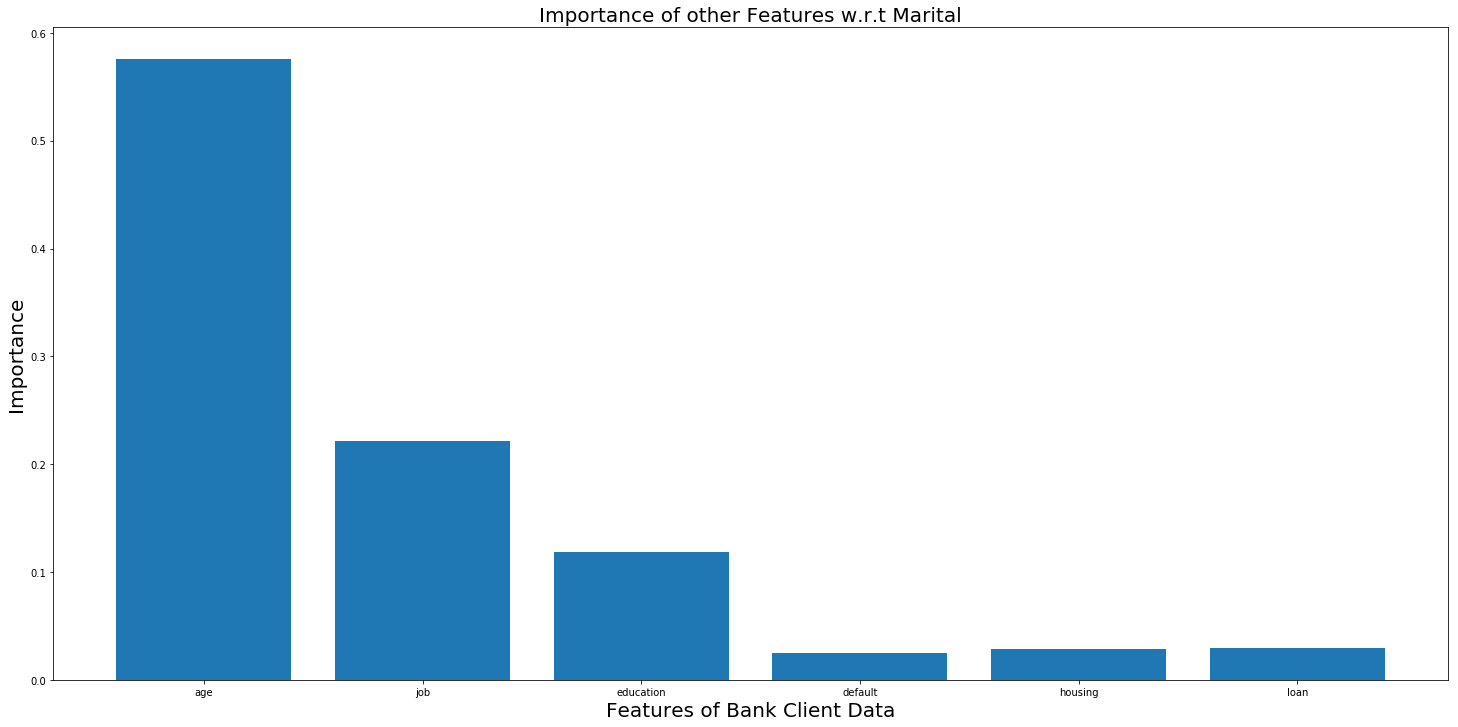

In [41]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(25,12))
ax.bar(Xtrain.columns,clf.feature_importances_)
ax.set_xlabel('Features of Bank Client Data',fontsize=20)
ax.set_ylabel('Importance',fontsize=20)
ax.set_title('Importance of other Features w.r.t Marital',fontsize=20)

In [42]:
#As 'age','job','education' have more significant performance than the other 
#independent varaibles. Hence consideriing these 3 for fitting random forest 
c=['age','job','education']
Xtrain = Xtrain[c]
Xtest = Xtest[c]

In [43]:
#Fittin RandomForest 
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier() 
clf.fit((Xtrain), np.asarray(list(pd.factorize(ytrain)))[0])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [44]:
data_correalation(Xtest)

Index(['job', 'education'], dtype='object')


In [45]:
pred_ = clf.predict((Xtest))

In [49]:
np.unique(np.asarray(list(pd.factorize(ytrain)))[0])
pd.factorize(ytrain)

(array([0, 0, 0, ..., 0, 0, 0]),
 Index(['married', 'single', 'divorced'], dtype='object'))

In [47]:
pred_

array([0, 0, 0, 1, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 2, 2])

In [53]:
c_data_imputation=data_unpruned_training.copy()

In [54]:
# c_data_imputation[c_data_imputation['marital']=='unknown']['marital']='ppp'
c_data_imputation.loc[c_data_imputation.marital=='unknown','marital'] = pred_

In [55]:
c_data_imputation.loc[c_data_imputation.marital==0,'marital'] = 'married'
c_data_imputation.loc[c_data_imputation.marital==1,'marital'] = 'single'
c_data_imputation.loc[c_data_imputation.marital==2,'marital'] = 'divorced'

In [56]:
#--------#
len(c_data_imputation[c_data_imputation['marital']=='unknown']['marital'])

0

In [57]:
c_data_imputation[data_unpruned_training['marital']=='unknown']['marital']

390       married
1493      married
3478      married
4196       single
4344     divorced
4454      married
7368     divorced
7632      married
9487      married
9714     divorced
10547     married
11679     married
11789     married
11883     married
12028     married
14788     married
14789     married
15134     married
15202      single
15289      single
17344     married
17421     married
17652     married
20603      single
20604      single
20761      single
20777     married
20779     married
22262     married
22269     married
           ...   
26973     married
26975     married
27835     married
28034     married
29200     married
29772     married
30522      single
30524      single
30952     married
31315     married
31349      single
32009     married
32663     married
32811     married
32815     married
32999     married
33315     married
33353     married
34423      single
34698     married
35876     married
36380      single
36434     married
37387     married
37425     

In [58]:
#Performing Data Imputation for Job
c_data_removed_job=bank_client_data.copy()

In [59]:
y = c_data_removed_job['job']

In [60]:
ytest=y[y=='unknown']
ytrain=y[-(y=='unknown')]

In [61]:
Xtest=(c_data_removed_job[c_data_removed_job['job']=='unknown']).drop('job', axis=1)
Xtrain=(c_data_removed_job[-(c_data_removed_job['job']=='unknown')]).drop('job', axis=1)

In [62]:
data_correalation(Xtrain)

Index(['marital', 'education', 'default', 'housing', 'loan'], dtype='object')


In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier()
clf.fit(Xtrain, np.asarray(list(pd.factorize(ytrain)))[0])
clf.feature_importances_

array([0.46824558, 0.03231968, 0.4392118 , 0.02251038, 0.02014816,
       0.01756439])

Text(0.5,1,'Importance of other Features w.r.t Job')

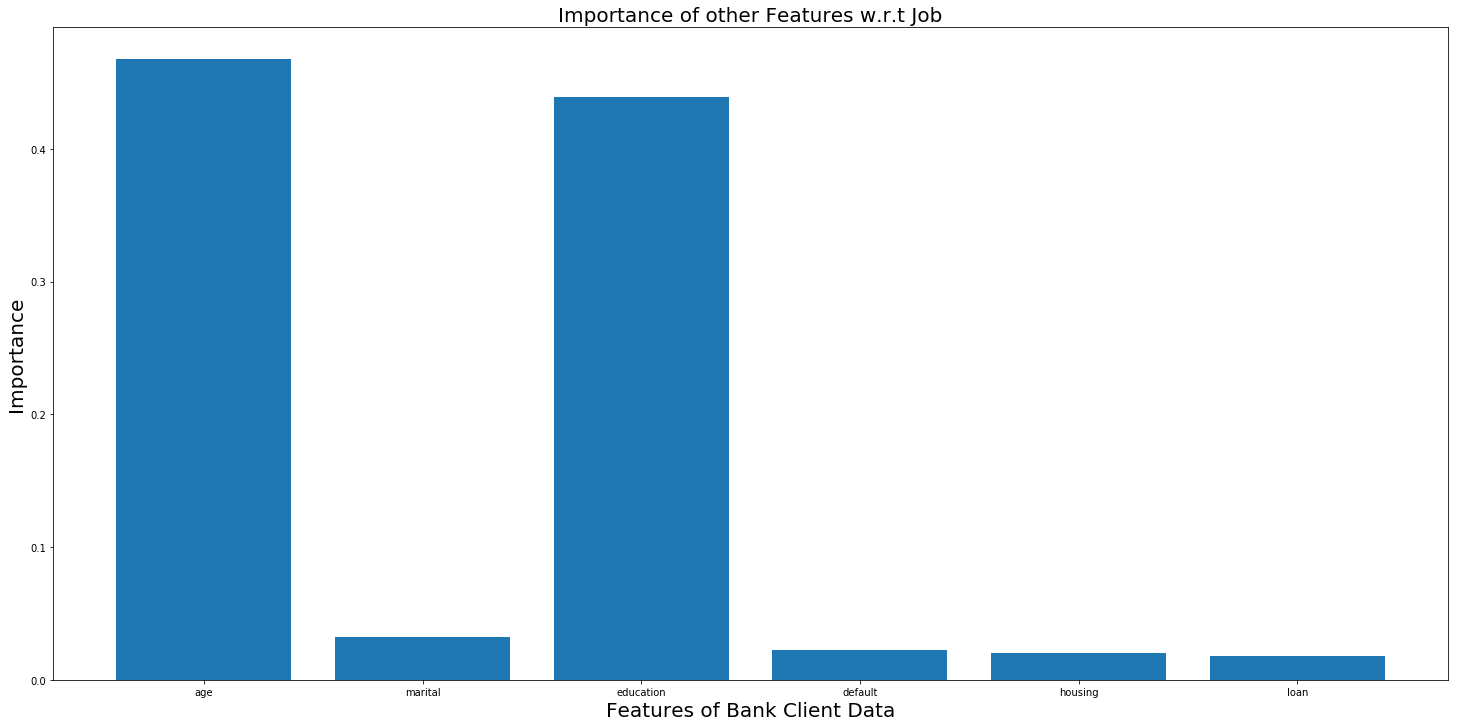

In [64]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(25,12))
ax.bar(Xtrain.columns,clf.feature_importances_)
ax.set_xlabel('Features of Bank Client Data',fontsize=20)
ax.set_ylabel('Importance',fontsize=20)
ax.set_title('Importance of other Features w.r.t Job',fontsize=20)

In [65]:
#As 'age','job','education' have more significant performance than the other 
#independent varaibles. Hence consideriing these 3 for fitting random forest 
c=['age','education']
Xtrain = Xtrain[c]
Xtest = Xtest[c]

In [66]:
#Fitting RandomForest 
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier()
clf.fit((Xtrain), np.asarray(list(pd.factorize(ytrain)))[0])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [67]:
data_correalation(Xtest)

Index(['education'], dtype='object')


In [68]:
pred_job = clf.predict((Xtest))

In [69]:
pred_job

array([3, 2, 3, 3, 3, 3, 3, 3, 3, 5, 3, 5, 3, 3, 3, 4, 6, 1, 3, 3, 2, 3,
       3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 4, 4, 3, 3, 4, 3, 3,
       3, 3, 2, 5, 2, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 4, 5, 1, 4, 4, 2,
       3, 4, 3, 3, 3, 3, 3, 3, 3, 2, 5, 4, 4, 3, 3, 2, 3, 2, 3, 4, 3, 3,
       3, 5, 3, 3, 3, 5, 3, 1, 3, 4, 3, 3, 4, 1, 2, 3, 4, 3, 3, 3, 4, 3,
       3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 1, 3, 3, 4, 3, 3, 3, 3, 3, 2, 5,
       2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 4, 4, 5, 3, 3, 5,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 4, 3, 3, 5, 4, 3,
       3, 4, 2, 3, 3, 4, 5, 3, 2, 2, 1, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 5, 3, 3, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 5, 2, 3, 4, 4, 4, 2, 2,
       3, 3, 2, 2, 5, 5, 2, 3, 3, 3, 3, 3, 5, 3, 3, 5, 3, 5, 5, 5, 3, 5,
       5, 5, 3, 3, 1, 1, 3, 3, 3, 5, 5, 3, 3, 3, 3, 3, 4, 4, 4, 5, 3, 1,
       3, 3, 5, 5, 5])

In [70]:
c_data_imputation_1= c_data_imputation.copy()

In [71]:
#------------------------------------ cleaned_data -----------------------------------------------------
# c_data_imputation[c_data_imputation['marital']=='unknown']['marital']='ppp'
c_data_imputation_1.loc[c_data_imputation_1.job=='unknown','job'] = pred_job

c_data_imputation_1.loc[c_data_imputation_1.job==0,'job'] = 'housemaid'
c_data_imputation_1.loc[c_data_imputation_1.job==1,'job'] = 'services'
c_data_imputation_1.loc[c_data_imputation_1.job==2,'job'] = 'admin.'
c_data_imputation_1.loc[c_data_imputation_1.job==3,'job'] = 'blue-collar'
c_data_imputation_1.loc[c_data_imputation_1.job==4,'job'] = 'technician'
c_data_imputation_1.loc[c_data_imputation_1.job==5,'job'] = 'retired'
c_data_imputation_1.loc[c_data_imputation_1.job==6,'job'] = 'management'
c_data_imputation_1.loc[c_data_imputation_1.job==7,'job'] = 'unemployed'
c_data_imputation_1.loc[c_data_imputation_1.job==8,'job'] = 'self-employed'
c_data_imputation_1.loc[c_data_imputation_1.job==9,'job'] = 'entrepreneur'
c_data_imputation_1.loc[c_data_imputation_1.job==10,'job'] = 'student'

In [72]:
len(c_data_imputation_1[c_data_imputation_1['job']=='unknown']['job'])

0

In [75]:
(c_data_imputation_1[data_unpruned_training['job']=='unknown']['job'])

29       blue-collar
35            admin.
73       blue-collar
91       blue-collar
299      blue-collar
303      blue-collar
343      blue-collar
388      blue-collar
428      blue-collar
476          retired
483      blue-collar
507          retired
582      blue-collar
584      blue-collar
878      blue-collar
885       technician
961       management
1165        services
1181     blue-collar
1207     blue-collar
1229          admin.
1271     blue-collar
1376     blue-collar
1671          admin.
1680          admin.
1860     blue-collar
1915     blue-collar
2010     blue-collar
2226     blue-collar
2287     blue-collar
            ...     
37928        retired
37929    blue-collar
38019        retired
38020        retired
38086        retired
38152    blue-collar
38153    blue-collar
38198       services
38199       services
38204    blue-collar
38532    blue-collar
38537    blue-collar
38697        retired
38700        retired
38916    blue-collar
38966    blue-collar
39108    blue

In [76]:
#--------------------------- Education ---------------------------------
c_data_removed_eduacation=bank_client_data

In [77]:
y = c_data_removed_eduacation['education']

In [78]:
ytest=y[y=='unknown']
ytrain=y[-(y=='unknown')]

In [79]:
Xtest=(c_data_removed_eduacation[c_data_removed_eduacation['education']=='unknown']).drop('education', axis=1)
Xtrain=(c_data_removed_eduacation[-(c_data_removed_eduacation['education']=='unknown')]).drop('education', axis=1)

In [80]:
data_correalation(Xtrain)

Index(['job', 'marital', 'default', 'housing', 'loan'], dtype='object')


In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier()
clf.fit(Xtrain, np.asarray(list(pd.factorize(ytrain)))[0])
clf.feature_importances_

array([0.39494024, 0.50015777, 0.03666126, 0.02428827, 0.02313933,
       0.02081314])

<BarContainer object of 6 artists>

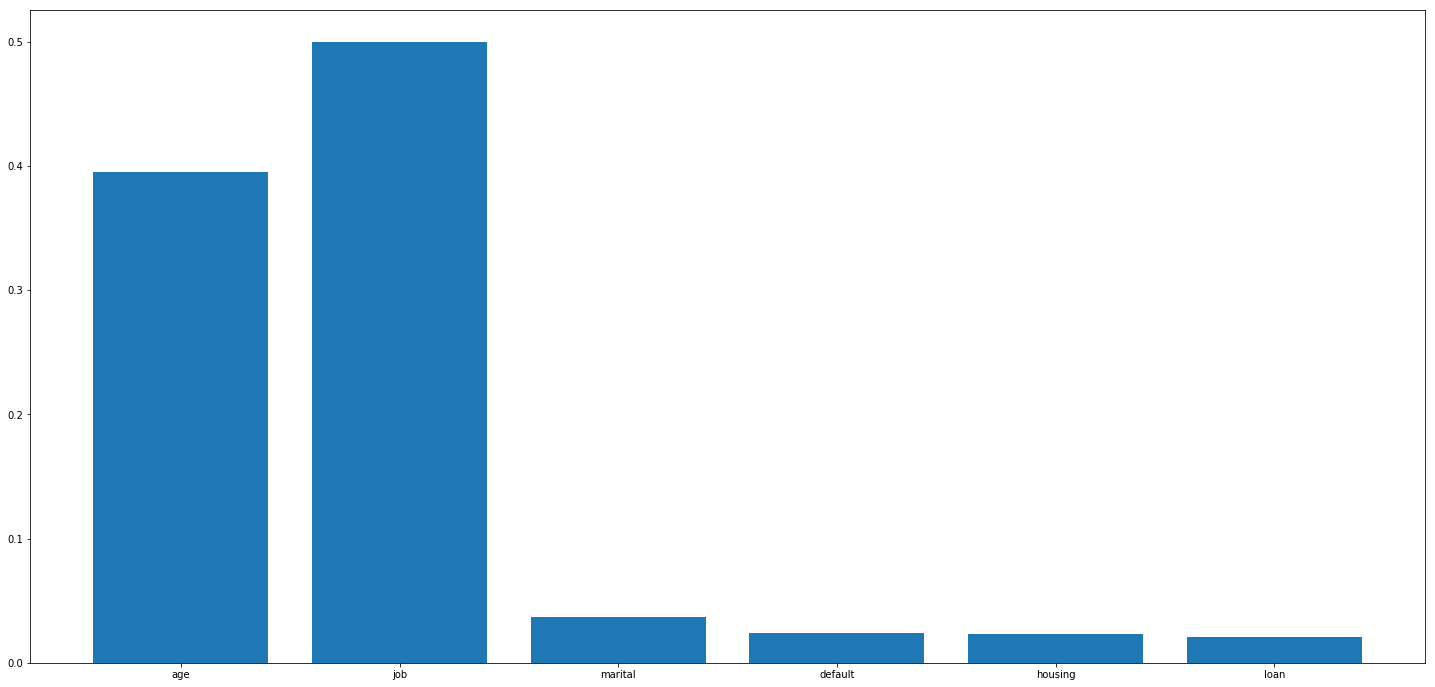

In [82]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(25,12))
ax.bar(Xtrain.columns,clf.feature_importances_)

In [83]:
#As 'age','job' have more significant performance than the other 
#independent varaibles. Hence consideriing these 3 for fitting random forest 
c=['age','job']
Xtrain = Xtrain[c]
Xtest = Xtest[c]

In [84]:
#Fitting RandomForest 
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier()
clf.fit((Xtrain), np.asarray(list(pd.factorize(ytrain)))[0])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [85]:
data_correalation(Xtest)

Index(['job'], dtype='object')


In [86]:
pred_education = clf.predict((Xtest))

In [87]:
len(pred_education)

1440

In [88]:
pd.factorize(ytrain)

(array([0, 1, 1, ..., 5, 4, 4]),
 Index(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
        'professional.course', 'university.degree', 'illiterate'],
       dtype='object'))

In [89]:
c_data_imputation_2= c_data_imputation_1.copy()

In [90]:
#------------------------------------ data imputation -----------------------------------------------------
# c_data_imputation[c_data_imputation['marital']=='unknown']['marital']='ppp'
c_data_imputation_2.loc[c_data_imputation_2.education=='unknown','education'] = pred_education

c_data_imputation_2.loc[c_data_imputation_2.education==0,'education'] = 'basic.4y'
c_data_imputation_2.loc[c_data_imputation_2.education==1,'education'] = 'high.school'
c_data_imputation_2.loc[c_data_imputation_2.education==2,'education'] = 'basic.6y'
c_data_imputation_2.loc[c_data_imputation_2.education==3,'education'] = 'basic.9y'
c_data_imputation_2.loc[c_data_imputation_2.education==4,'education'] = 'professional.course'
c_data_imputation_2.loc[c_data_imputation_2.education==5,'education'] = 'university.degree'
c_data_imputation_2.loc[c_data_imputation_2.education==6,'education'] = 'illiterate'


In [91]:
len(c_data_imputation_2[c_data_imputation_2['education']=='unknown']['education'])

0

In [94]:
(c_data_imputation_2[data_unpruned_training['education']=='unknown']['education'])

7                   basic.6y
10                  basic.6y
30               high.school
31         university.degree
32                  basic.4y
67               high.school
73       professional.course
78                  basic.4y
91       professional.course
92               high.school
100                 basic.4y
102                 basic.4y
109        university.degree
117                 basic.4y
118              high.school
132                 basic.4y
151        university.degree
154              high.school
156                 basic.4y
157                 basic.4y
213                 basic.4y
216              high.school
217              high.school
245              high.school
254                 basic.9y
258        university.degree
288                 basic.4y
299      professional.course
303      professional.course
306                 basic.4y
                ...         
40662      university.degree
40711      university.degree
40714               basic.4y
40718         

In [96]:
#--------------------------- default ---------------------------------
c_data_removed_default=bank_client_data.copy()

In [97]:
y = c_data_removed_default['default']

In [98]:
ytest=y[y=='unknown']
ytrain=y[-(y=='unknown')]

In [99]:
Xtest=(c_data_removed_default[c_data_removed_default['default']=='unknown']).drop('default', axis=1)
Xtrain=(c_data_removed_default[-(c_data_removed_default['default']=='unknown')]).drop('default', axis=1)

In [100]:
data_correalation(Xtrain)

Index(['job', 'marital', 'education', 'housing', 'loan'], dtype='object')


In [101]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier()
clf.fit(Xtrain, np.asarray(list(pd.factorize(ytrain)))[0])
clf.feature_importances_

array([0.36675761, 0.30128892, 0.06250283, 0.17599688, 0.04750986,
       0.0459439 ])

<BarContainer object of 6 artists>

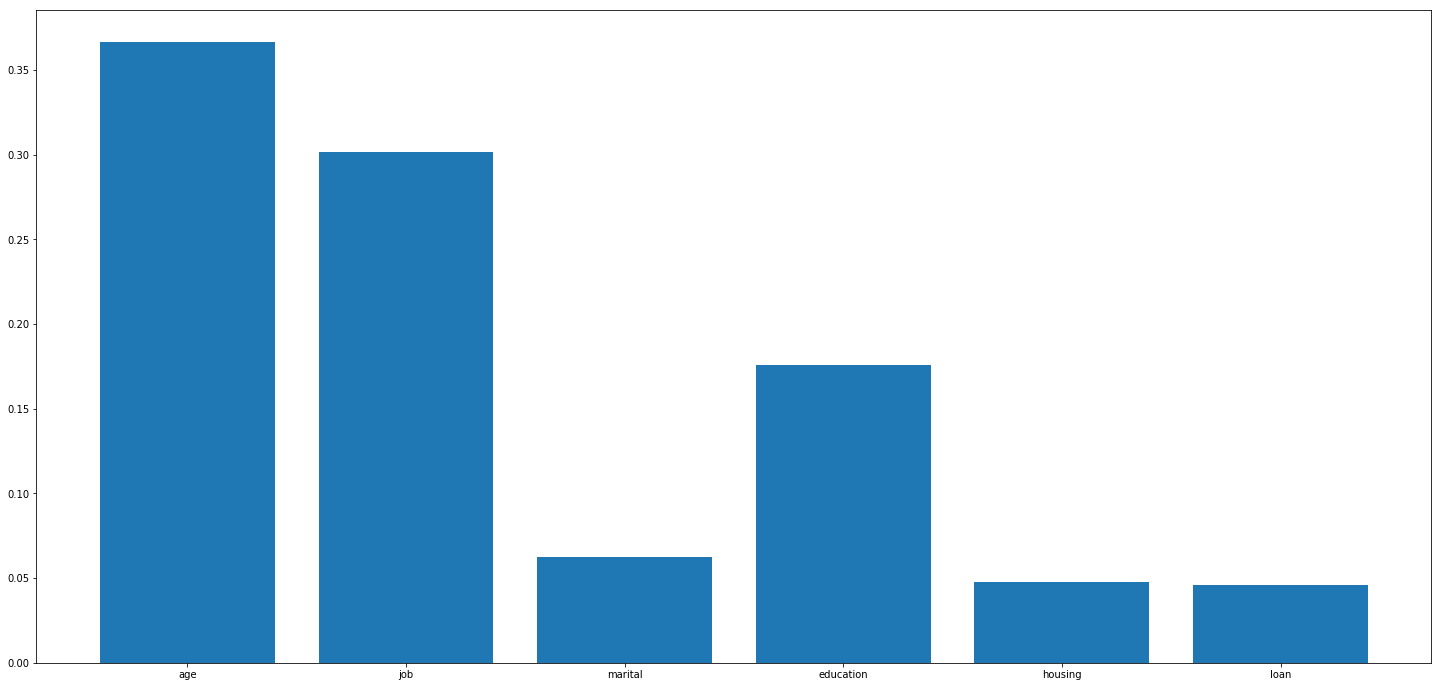

In [102]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(25,12))
ax.bar(Xtrain.columns,clf.feature_importances_)

In [103]:
#As 'age','job','education' have more significant performance than the other 
#independent varaibles. Hence consideriing these 3 for fitting random forest 
c=['age','job','education']
Xtrain = Xtrain[c]
Xtest = Xtest[c]

In [104]:
#Fitting RandomForest 
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier()
clf.fit((Xtrain), np.asarray(list(pd.factorize(ytrain)))[0])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [105]:
data_correalation(Xtest)

Index(['job', 'education'], dtype='object')


In [106]:
pred_default = clf.predict((Xtest))

In [108]:
np.unique(pred_default)

array([0])

In [109]:
c_data_imputation_3= c_data_imputation_2.copy()

In [110]:
#------------------------------------ data imputation -----------------------------------------------------
# c_data_imputation[c_data_imputation['marital']=='unknown']['marital']='ppp'
c_data_imputation_3.loc[c_data_imputation_3.default=='unknown','default'] = pred_default

c_data_imputation_3.loc[c_data_imputation_3.default==0,'default'] = 'no'
c_data_imputation_3.loc[c_data_imputation_3.default==1,'default'] = 'yes'


In [111]:
len(c_data_imputation_3[c_data_imputation_3['default']=='unknown']['default'])

0

In [113]:
(c_data_imputation_3[data_unpruned_training['default']=='unknown']['default'])

1        no
5        no
7        no
10       no
15       no
17       no
19       no
21       no
27       no
28       no
29       no
33       no
35       no
54       no
55       no
56       no
57       no
60       no
62       no
63       no
69       no
72       no
73       no
77       no
78       no
80       no
81       no
91       no
92       no
97       no
         ..
39433    no
39475    no
39476    no
39477    no
39479    no
39622    no
39625    no
39734    no
39756    no
39792    no
39953    no
39967    no
39975    no
40001    no
40076    no
40101    no
40361    no
40393    no
40414    no
40445    no
40656    no
40673    no
40702    no
40714    no
40718    no
40727    no
40886    no
40940    no
40941    no
40986    no
Name: default, Length: 7043, dtype: object

In [114]:
#--------------------------- housing ---------------------------------
c_data_removed_housing=bank_client_data

In [115]:
y = c_data_removed_housing['housing']

In [116]:
ytest=y[y=='unknown']
ytrain=y[-(y=='unknown')]

In [117]:
Xtest=(c_data_removed_housing[c_data_removed_housing['housing']=='unknown']).drop('housing', axis=1)
Xtrain=(c_data_removed_housing[-(c_data_removed_housing['housing']=='unknown')]).drop('housing', axis=1)

In [118]:
data_correalation(Xtrain)

Index(['job', 'marital', 'education', 'default', 'loan'], dtype='object')


In [119]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier()
clf.fit(Xtrain, np.asarray(list(pd.factorize(ytrain)))[0])
clf.feature_importances_

array([0.65571932, 0.17198814, 0.0539989 , 0.0869343 , 0.02021475,
       0.0111446 ])

<BarContainer object of 6 artists>

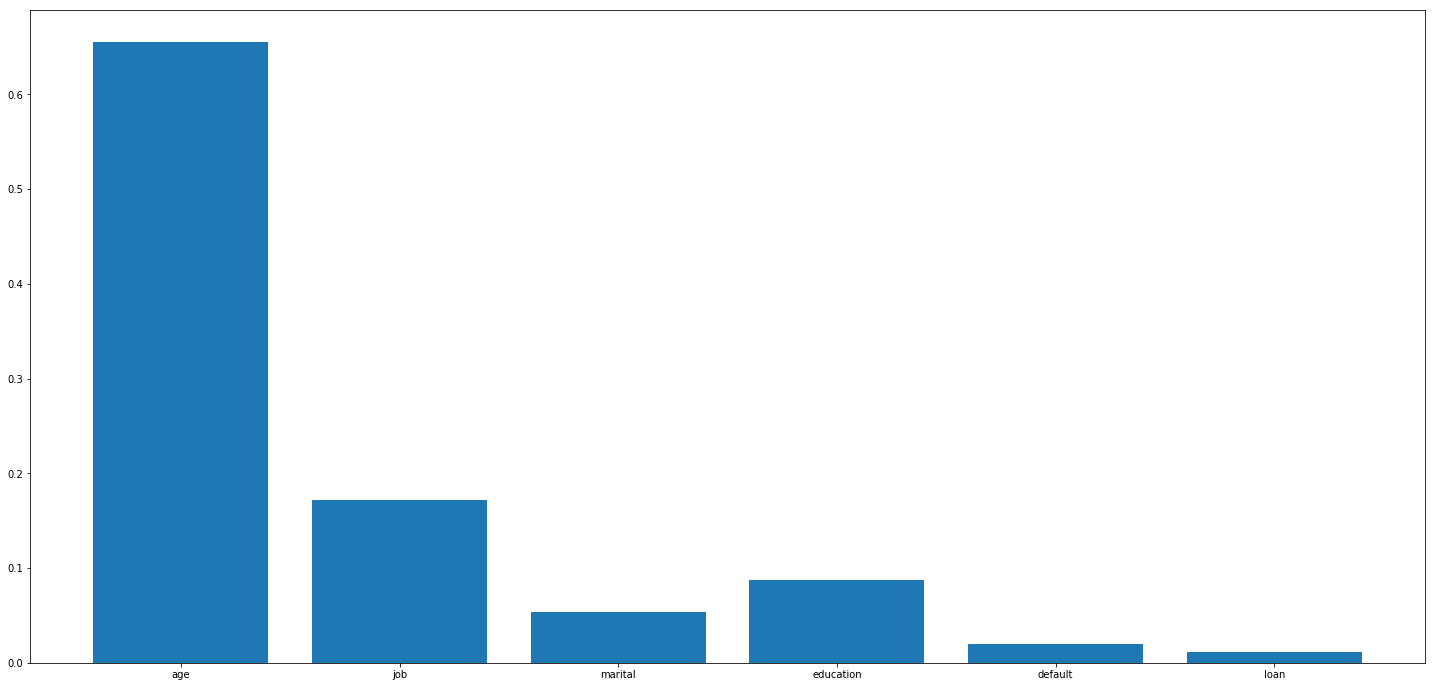

In [120]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(25,12))
ax.bar(Xtrain.columns,clf.feature_importances_)

In [121]:
#As 'age','job','education' have more significant performance than the other 
#independent varaibles. Hence consideriing these 3 for fitting random forest 
c=['age','job','education']
Xtrain = Xtrain[c]
Xtest = Xtest[c]

In [122]:
#Fitting RandomForest 
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier()
clf.fit((Xtrain), np.asarray(list(pd.factorize(ytrain)))[0])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [123]:
data_correalation(Xtest)

Index(['job', 'education'], dtype='object')


In [124]:
pred_housing = clf.predict((Xtest))

In [125]:
len(pred_housing)

848

In [126]:
pd.factorize(ytrain)

(array([0, 0, 1, ..., 1, 0, 1]), Index(['no', 'yes'], dtype='object'))

In [127]:
c_data_imputation_4= c_data_imputation_3.copy()

In [128]:
#------------------------------------ data imputation -----------------------------------------------------
# c_data_imputation[c_data_imputation['marital']=='unknown']['marital']='ppp'
c_data_imputation_4.loc[c_data_imputation_4.housing=='unknown','housing'] = pred_housing

c_data_imputation_4.loc[c_data_imputation_4.housing==0,'housing'] = 'no'
c_data_imputation_4.loc[c_data_imputation_4.housing==1,'housing'] = 'yes'


In [129]:
len(c_data_imputation_4[c_data_imputation_4['housing']=='unknown']['housing'])

0

In [132]:
((c_data_imputation_4[data_unpruned_training['housing']=='unknown']['housing']))

29        no
81       yes
261       no
385      yes
401      yes
470      yes
485      yes
494       no
495      yes
520      yes
549      yes
564      yes
569      yes
570      yes
571      yes
593       no
640       no
663      yes
768      yes
770      yes
783       no
790       no
814      yes
903      yes
941       no
975      yes
991      yes
1004      no
1024      no
1033     yes
        ... 
39870     no
40027    yes
40062     no
40098     no
40273     no
40279    yes
40316    yes
40367     no
40427    yes
40430    yes
40491    yes
40530     no
40607    yes
40608    yes
40609    yes
40627     no
40658    yes
40661     no
40725    yes
40732     no
40764     no
40792    yes
40832     no
40875     no
40895    yes
40941     no
40990     no
41014    yes
41015    yes
41115    yes
Name: housing, Length: 848, dtype: object

In [133]:
#--------------------------- loan ---------------------------------
c_data_removed_loan=bank_client_data.copy()

In [134]:
y = c_data_removed_loan['loan']

In [135]:
ytest=y[y=='unknown']
ytrain=y[-(y=='unknown')]

In [136]:
Xtest=(c_data_removed_loan[c_data_removed_loan['loan']=='unknown']).drop('loan', axis=1)
Xtrain=(c_data_removed_loan[-(c_data_removed_loan['loan']=='unknown')]).drop('loan', axis=1)

In [137]:
data_correalation(Xtrain)

Index(['job', 'marital', 'education', 'default', 'housing'], dtype='object')


In [138]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier()
clf.fit(Xtrain, np.asarray(list(pd.factorize(ytrain)))[0])
clf.feature_importances_

array([0.576155  , 0.18029441, 0.06300146, 0.1347047 , 0.03075391,
       0.01509051])

<BarContainer object of 6 artists>

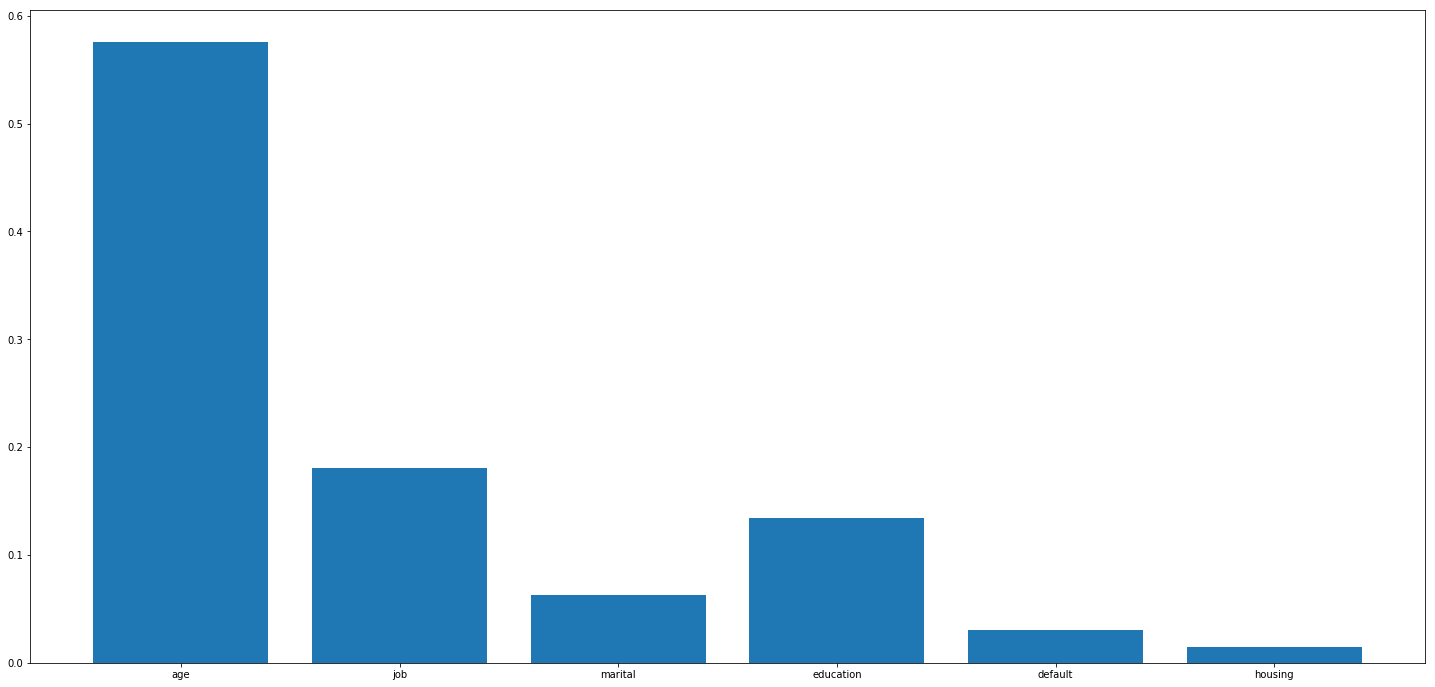

In [139]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(25,12))
ax.bar(Xtrain.columns,clf.feature_importances_)

In [140]:
#As 'age','job','education' have more significant performance than the other 
#independent varaibles. Hence consideriing these 3 for fitting random forest 
c=['age','job','education']
Xtrain = Xtrain[c]
Xtest = Xtest[c]

In [141]:
#Fitting RandomForest 
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier()
clf.fit((Xtrain), np.asarray(list(pd.factorize(ytrain)))[0])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [142]:
data_correalation(Xtest)

Index(['job', 'education'], dtype='object')


In [143]:
pred_loan = clf.predict((Xtest))

In [144]:
len(pred_loan)

848

In [145]:
pd.factorize(ytrain)

(array([0, 0, 0, ..., 0, 0, 0]), Index(['no', 'yes'], dtype='object'))

In [146]:
c_data_imputation_5= c_data_imputation_4.copy()

In [147]:
#------------------------------------ data imputation -----------------------------------------------------
# c_data_imputation[c_data_imputation['marital']=='unknown']['marital']='ppp'
c_data_imputation_5.loc[c_data_imputation_5.loan=='unknown','loan'] = pred_loan

c_data_imputation_5.loc[c_data_imputation_5.loan==0,'loan'] = 'no'
c_data_imputation_5.loc[c_data_imputation_5.loan==1,'loan'] = 'yes'


In [148]:
len(c_data_imputation_5[c_data_imputation_5['loan']=='unknown']['loan'])

0

In [150]:
((c_data_imputation_5[data_unpruned_training['loan']=='unknown']['loan']))

29        no
81        no
261       no
385       no
401       no
470       no
485       no
494       no
495       no
520       no
549       no
564       no
569       no
570       no
571       no
593       no
640       no
663       no
768       no
770       no
783       no
790       no
814       no
903       no
941      yes
975       no
991       no
1004     yes
1024      no
1033      no
        ... 
39870     no
40027     no
40062     no
40098     no
40273     no
40279     no
40316     no
40367    yes
40427     no
40430     no
40491     no
40530     no
40607     no
40608     no
40609     no
40627     no
40658     no
40661     no
40725     no
40732     no
40764     no
40792     no
40832     no
40875     no
40895     no
40941     no
40990     no
41014     no
41015     no
41115     no
Name: loan, Length: 848, dtype: object

In [152]:
#Checking the imputation
((c_data_imputation_5[data_unpruned_training['loan']=='unknown']['loan']))

29        no
81        no
261       no
385       no
401       no
470       no
485       no
494       no
495       no
520       no
549       no
564       no
569       no
570       no
571       no
593       no
640       no
663       no
768       no
770       no
783       no
790       no
814       no
903       no
941      yes
975       no
991       no
1004     yes
1024      no
1033      no
        ... 
39870     no
40027     no
40062     no
40098     no
40273     no
40279     no
40316     no
40367    yes
40427     no
40430     no
40491     no
40530     no
40607     no
40608     no
40609     no
40627     no
40658     no
40661     no
40725     no
40732     no
40764     no
40792     no
40832     no
40875     no
40895     no
40941     no
40990     no
41014     no
41015     no
41115     no
Name: loan, Length: 848, dtype: object

In [153]:
((c_data_imputation_5[data_unpruned_training['housing']=='unknown']['housing']))

29        no
81       yes
261       no
385      yes
401      yes
470      yes
485      yes
494       no
495      yes
520      yes
549      yes
564      yes
569      yes
570      yes
571      yes
593       no
640       no
663      yes
768      yes
770      yes
783       no
790       no
814      yes
903      yes
941       no
975      yes
991      yes
1004      no
1024      no
1033     yes
        ... 
39870     no
40027    yes
40062     no
40098     no
40273     no
40279    yes
40316    yes
40367     no
40427    yes
40430    yes
40491    yes
40530     no
40607    yes
40608    yes
40609    yes
40627     no
40658    yes
40661     no
40725    yes
40732     no
40764     no
40792    yes
40832     no
40875     no
40895    yes
40941     no
40990     no
41014    yes
41015    yes
41115    yes
Name: housing, Length: 848, dtype: object

In [154]:
(c_data_imputation_5[data_unpruned_training['default']=='unknown']['default'])

1        no
5        no
7        no
10       no
15       no
17       no
19       no
21       no
27       no
28       no
29       no
33       no
35       no
54       no
55       no
56       no
57       no
60       no
62       no
63       no
69       no
72       no
73       no
77       no
78       no
80       no
81       no
91       no
92       no
97       no
         ..
39433    no
39475    no
39476    no
39477    no
39479    no
39622    no
39625    no
39734    no
39756    no
39792    no
39953    no
39967    no
39975    no
40001    no
40076    no
40101    no
40361    no
40393    no
40414    no
40445    no
40656    no
40673    no
40702    no
40714    no
40718    no
40727    no
40886    no
40940    no
40941    no
40986    no
Name: default, Length: 7043, dtype: object

In [155]:
(c_data_imputation_5[data_unpruned_training['education']=='unknown']['education'])

7                   basic.6y
10                  basic.6y
30               high.school
31         university.degree
32                  basic.4y
67               high.school
73       professional.course
78                  basic.4y
91       professional.course
92               high.school
100                 basic.4y
102                 basic.4y
109        university.degree
117                 basic.4y
118              high.school
132                 basic.4y
151        university.degree
154              high.school
156                 basic.4y
157                 basic.4y
213                 basic.4y
216              high.school
217              high.school
245              high.school
254                 basic.9y
258        university.degree
288                 basic.4y
299      professional.course
303      professional.course
306                 basic.4y
                ...         
40662      university.degree
40711      university.degree
40714               basic.4y
40718         

In [156]:
(c_data_imputation_5[data_unpruned_training['job']=='unknown']['job'])

29       blue-collar
35            admin.
73       blue-collar
91       blue-collar
299      blue-collar
303      blue-collar
343      blue-collar
388      blue-collar
428      blue-collar
476          retired
483      blue-collar
507          retired
582      blue-collar
584      blue-collar
878      blue-collar
885       technician
961       management
1165        services
1181     blue-collar
1207     blue-collar
1229          admin.
1271     blue-collar
1376     blue-collar
1671          admin.
1680          admin.
1860     blue-collar
1915     blue-collar
2010     blue-collar
2226     blue-collar
2287     blue-collar
            ...     
37928        retired
37929    blue-collar
38019        retired
38020        retired
38086        retired
38152    blue-collar
38153    blue-collar
38198       services
38199       services
38204    blue-collar
38532    blue-collar
38537    blue-collar
38697        retired
38700        retired
38916    blue-collar
38966    blue-collar
39108    blue

In [157]:
len(c_data_imputation_5[data_unpruned_training['marital']=='unknown']['marital'])

64

In [158]:
c_data_imputation_5.to_csv('unprunued_imputed_data_training_data.csv')